In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [223]:
data=pd.read_csv('/content/Obesity.csv')

In [224]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [225]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [227]:
data.nunique()

Gender                               2
Age                               1406
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [228]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [229]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

<ipython-input-230-e0ce5bed7e23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette = 'hls')


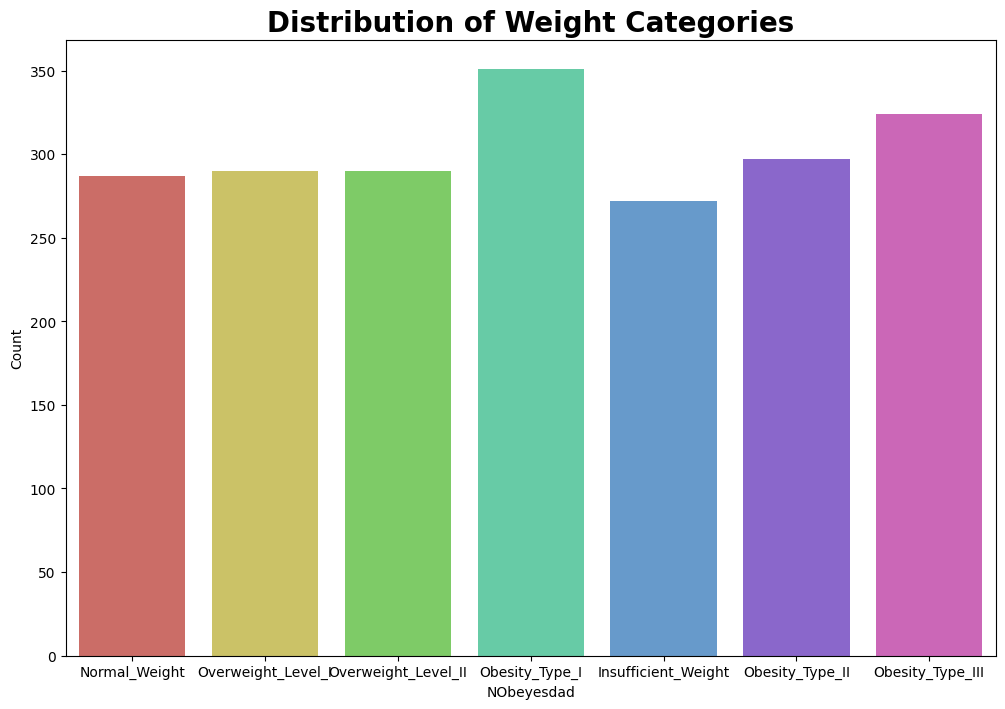

In [230]:
plt.figure(figsize=(12,8))
sns.countplot(x='NObeyesdad', data=data,palette = 'hls')
plt.title('Distribution of Weight Categories', fontsize = 20, fontweight = 'bold')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


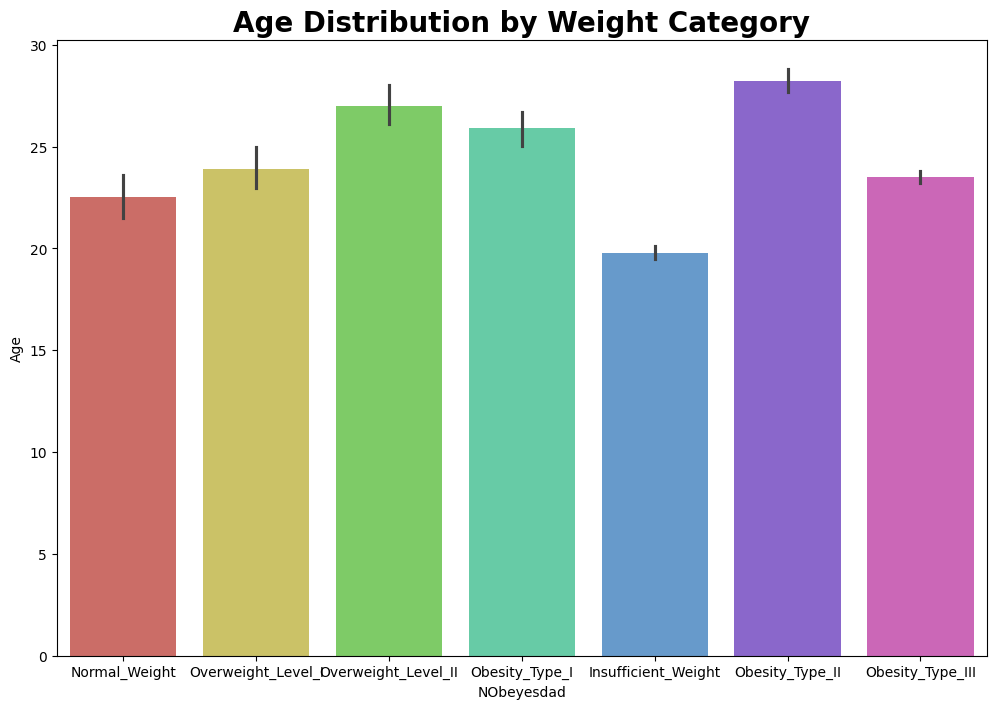

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


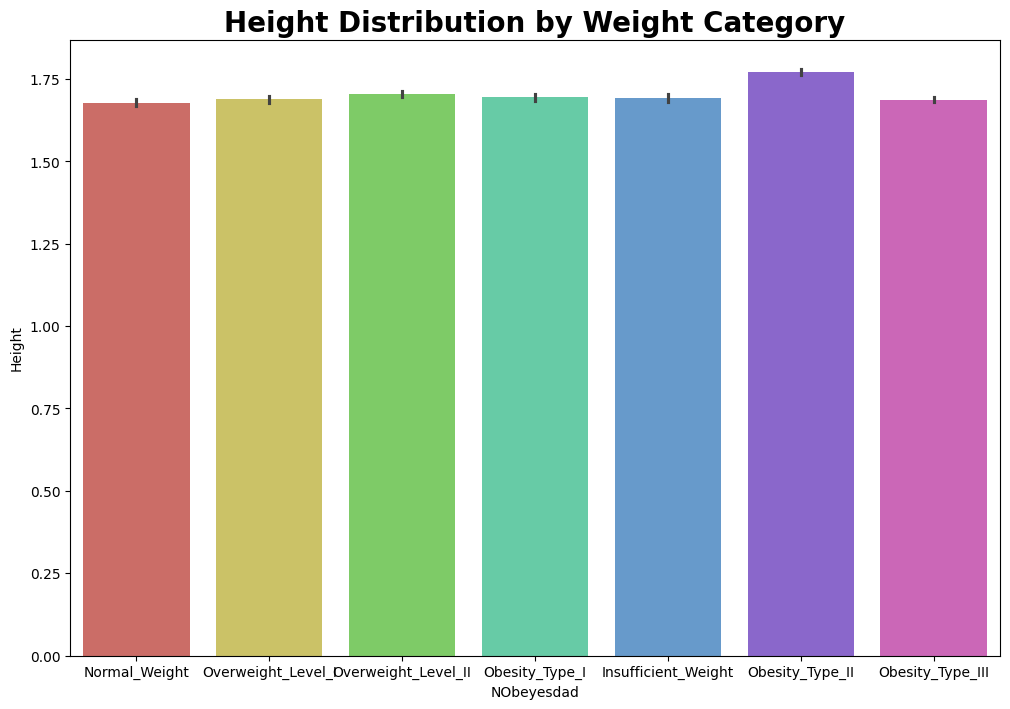

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


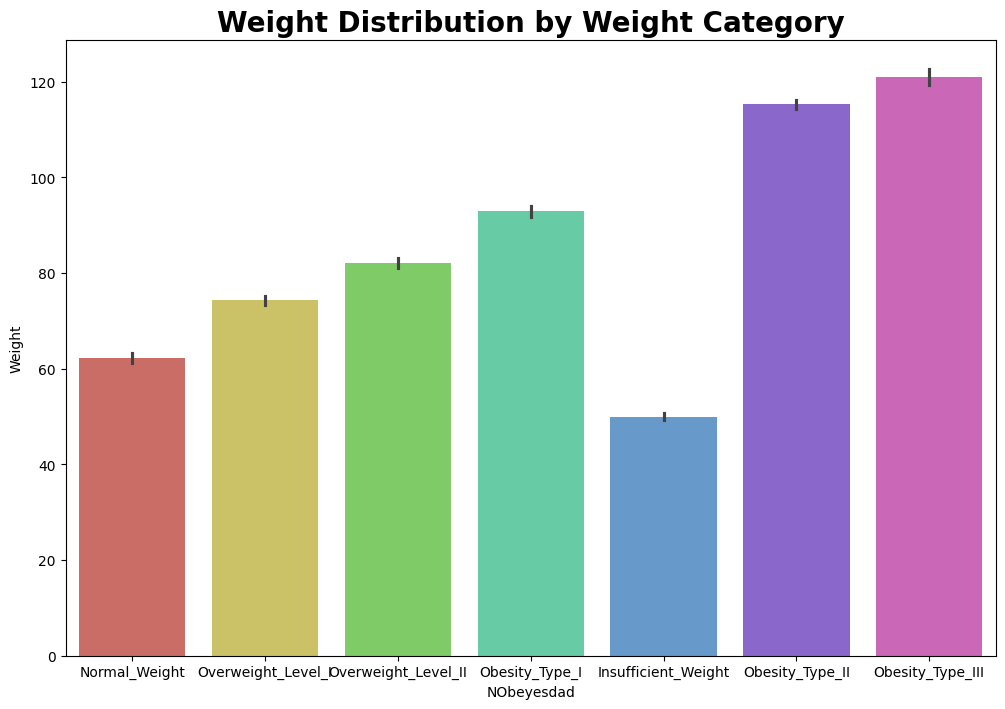

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


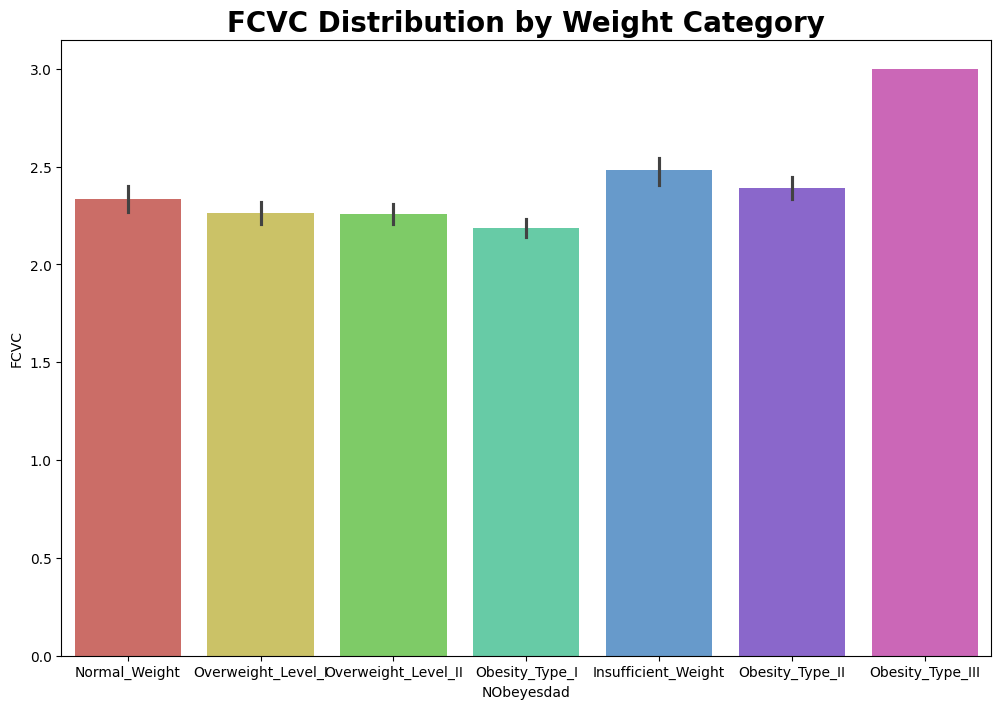

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


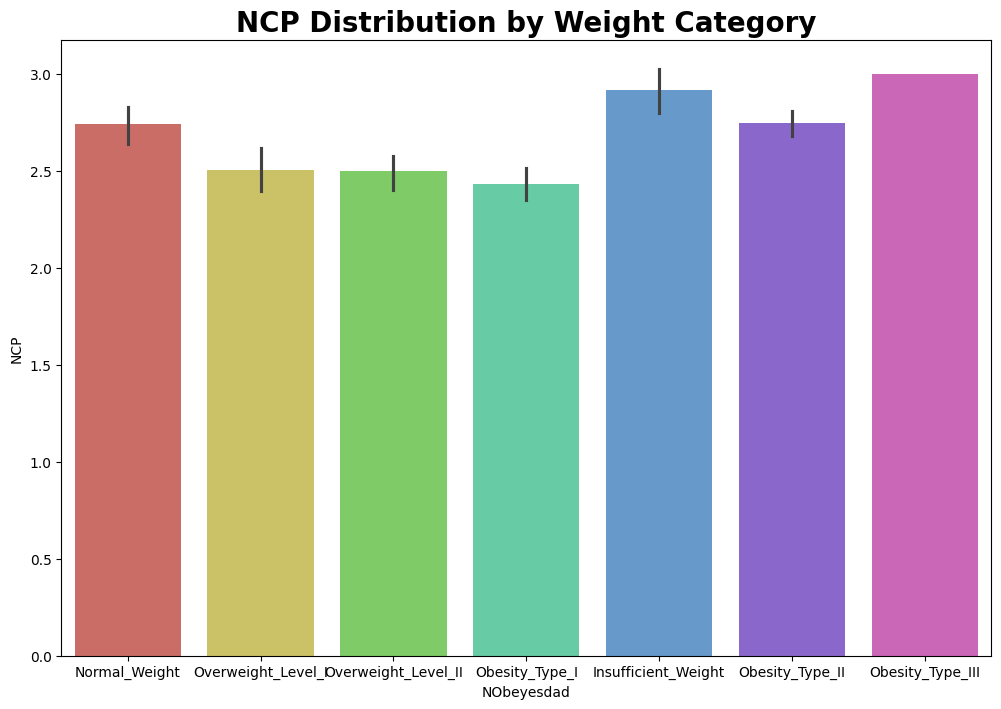

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


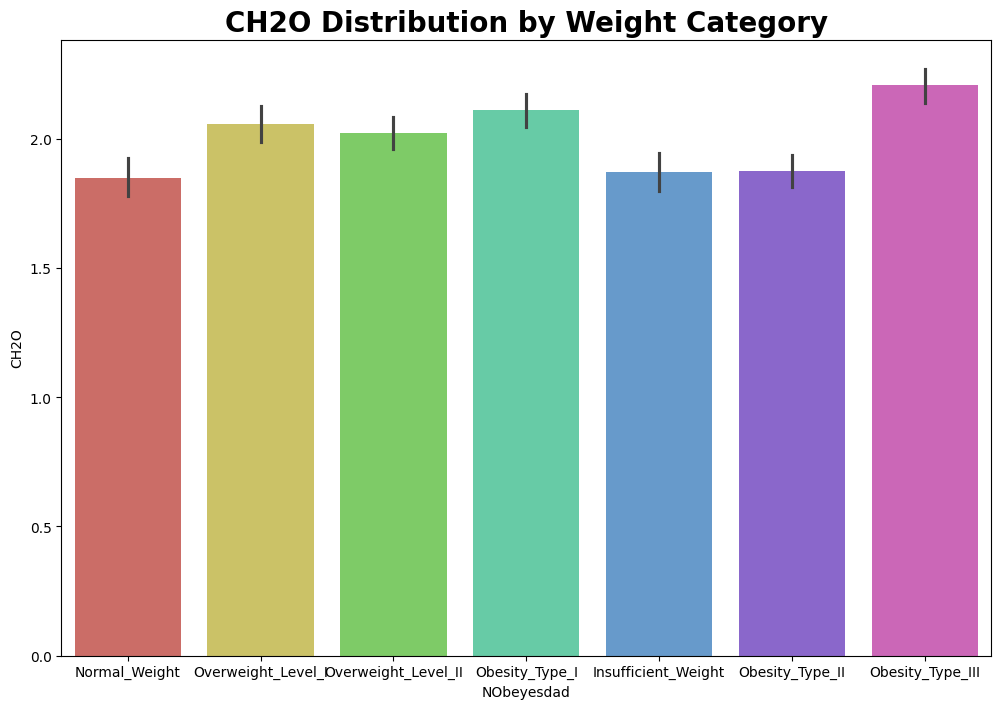

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


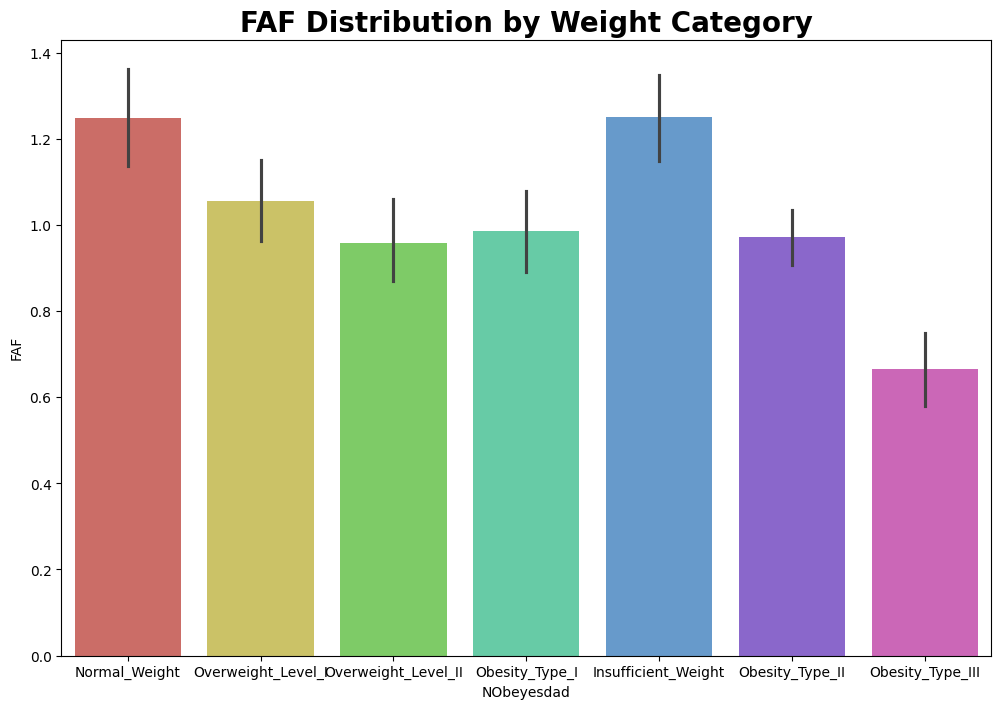

<ipython-input-231-cb2e841f631a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')


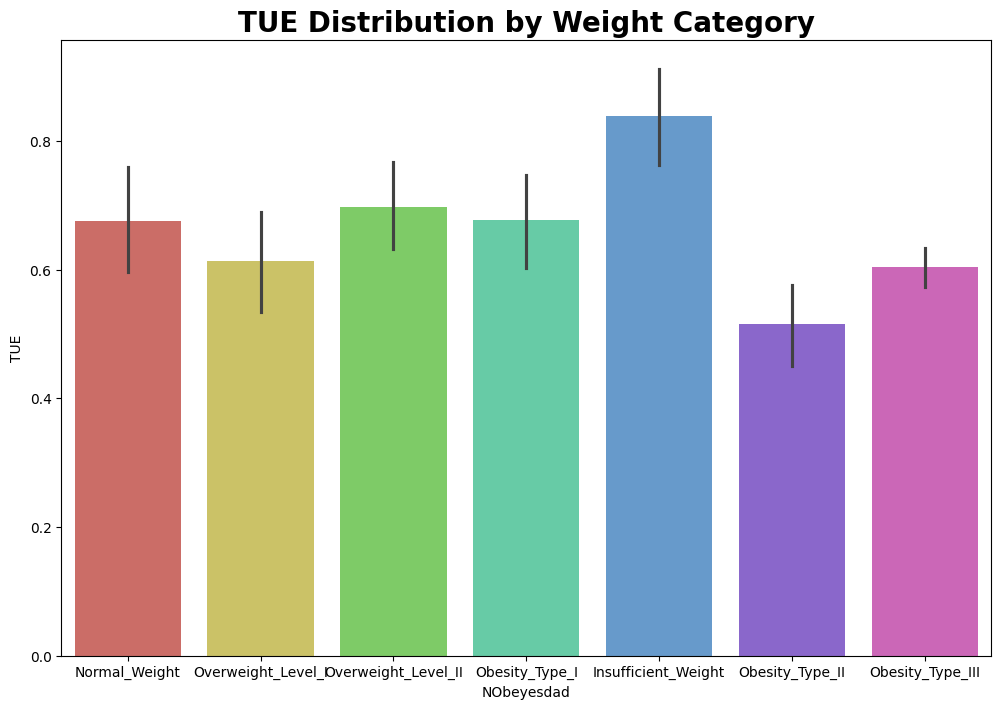

In [231]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for feature in numerical_features:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='NObeyesdad', y=feature, data=data,palette = 'hls')
    plt.title(f'{feature} Distribution by Weight Category', fontsize = 20, fontweight = 'bold')
    plt.xlabel('NObeyesdad')
    plt.ylabel(feature)
    plt.show()

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


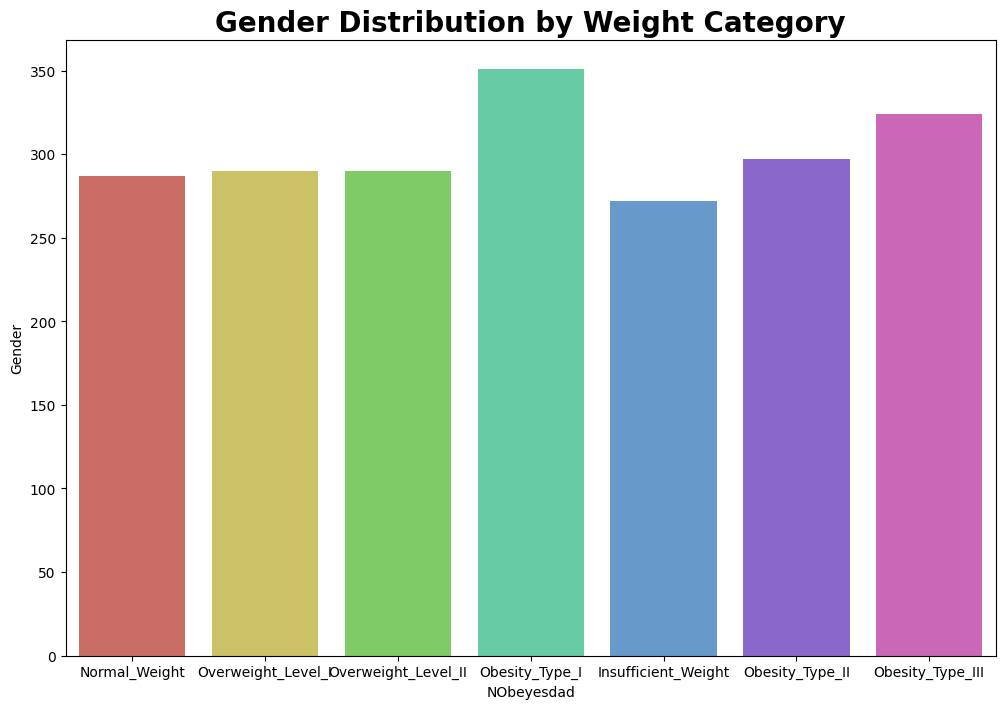

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


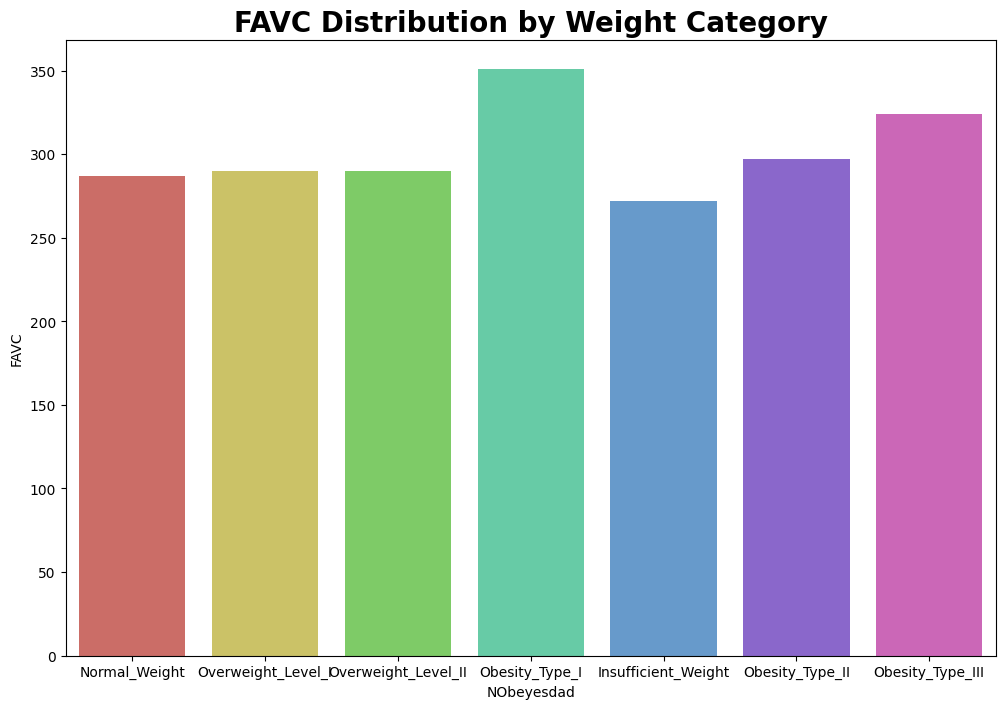

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


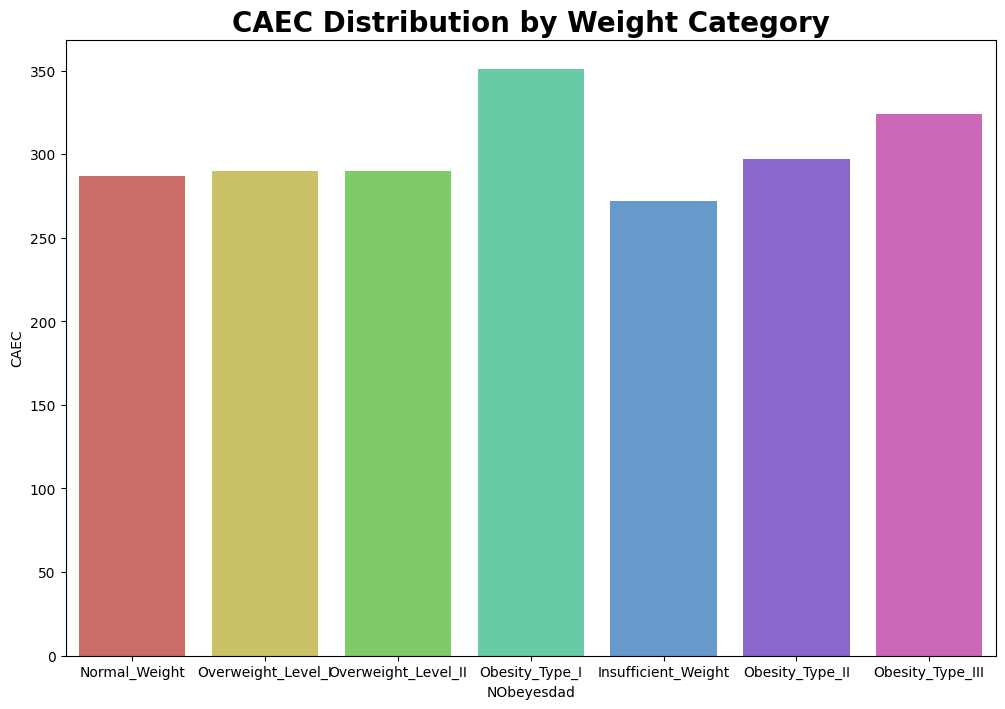

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


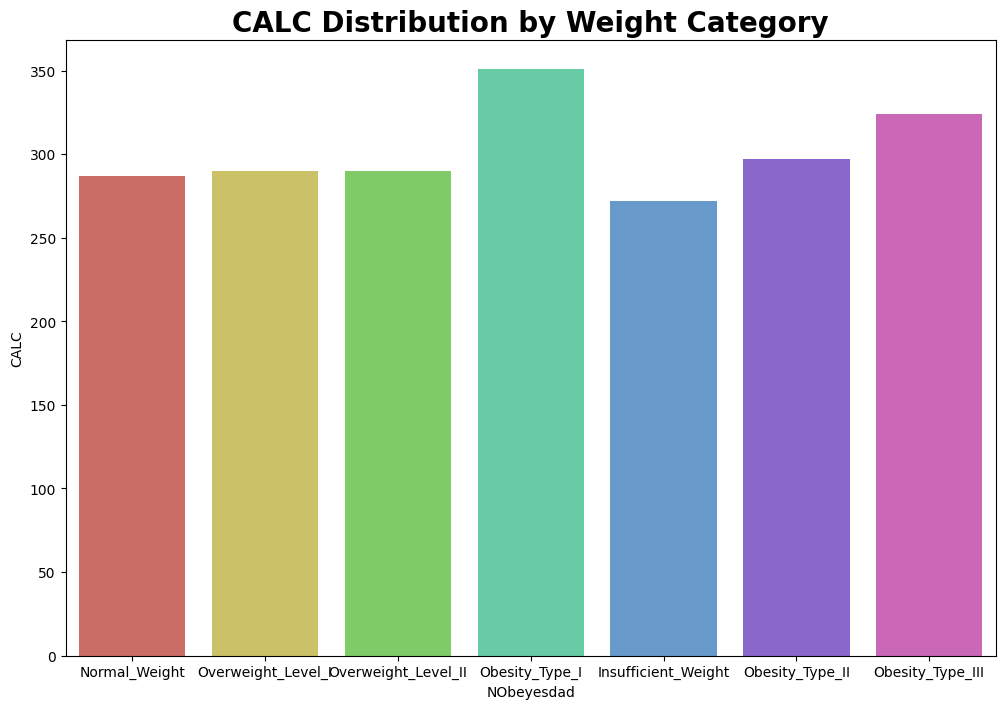

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


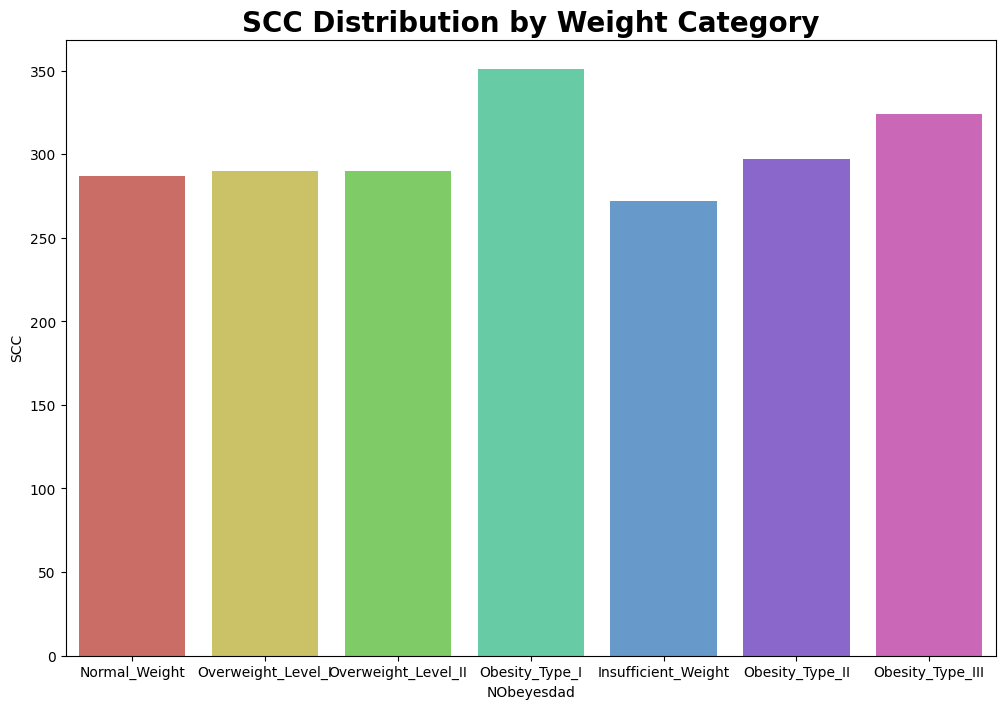

<ipython-input-232-43556d4afb3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=data,palette='hls')


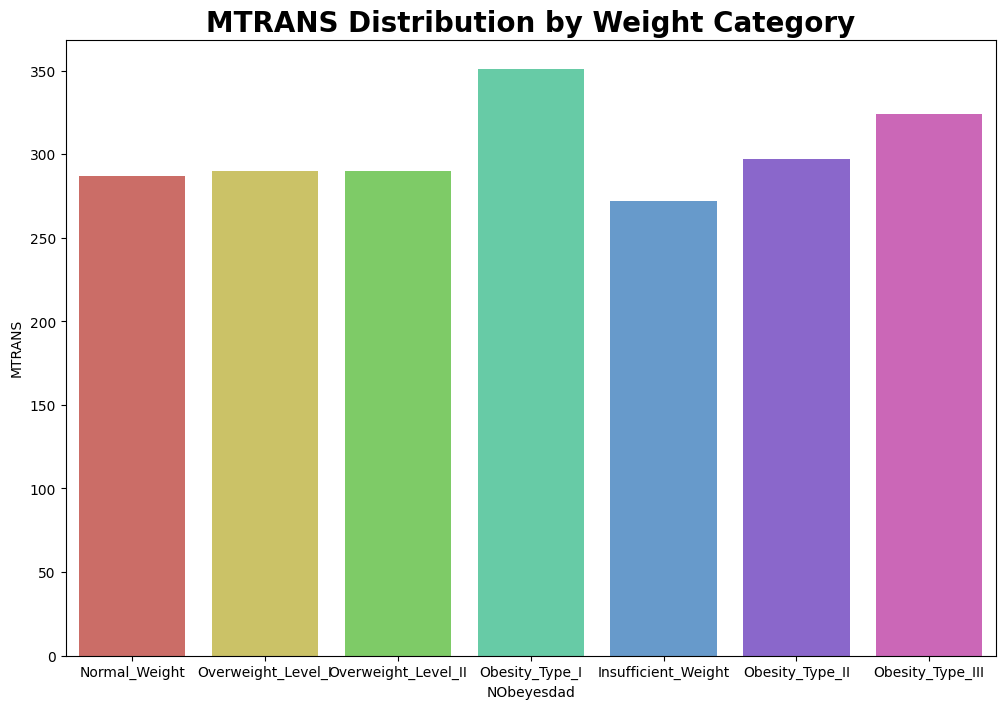

In [232]:
categorical_features = ['Gender', 'FAVC', 'CAEC', 'CALC', 'SCC', 'MTRANS']
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='NObeyesdad', data=data,palette='hls')
    plt.title(f'{feature} Distribution by Weight Category', fontsize = 20, fontweight = 'bold')
    plt.xlabel('NObeyesdad')
    plt.ylabel(feature)
    plt.show()

In [233]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [234]:
data.fillna(data.mean(), inplace=True)

<ipython-input-234-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [235]:
data.isnull().sum()

Gender                            9
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    6
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              9
SMOKE                             0
CH2O                              0
SCC                               7
FAF                               0
TUE                               0
CALC                              0
MTRANS                            7
NObeyesdad                        0
dtype: int64

In [236]:
constant_value='N'

In [237]:
data.fillna(constant_value, inplace=True)

In [238]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [239]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Encoding the categorical values

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

ENCODING


here some of the values object type so we want to convert it into int type using label encoder which is a technique for encoding the categorical variables as numerical values.

In [241]:
from sklearn.preprocessing import LabelEncoder

In [242]:
Label_encoder=LabelEncoder()

In [243]:
data['Gender'] = Label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = Label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = Label_encoder.fit_transform(data['FAVC'])
data['CAEC'] = Label_encoder.fit_transform(data['CAEC'])
data['SMOKE'] = Label_encoder.fit_transform(data['SMOKE'])
data['CALC'] = Label_encoder.fit_transform(data['CALC'])
data['SCC'] = Label_encoder.fit_transform(data['SCC'])
data['MTRANS'] = Label_encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = Label_encoder.fit_transform(data['NObeyesdad'])


SPLITTING THE DATAS INTO TEST AND TRAIN DATAS

In the X variables we are providing our feature variables that is our eating and physical conditions.
Y Variable is our target that is the weight category

In [244]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10,shuffle=True)

SCALING THE DATA

In [247]:
from sklearn.preprocessing import StandardScaler

In [248]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL TRAINING

1.KNN CLASSIFIER

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
from sklearn.svm import SVC

In [251]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [252]:
knn_predictions=knn_classifier.predict(X_test_scaled)

In [253]:
knn_accuracy=accuracy_score(y_test,knn_predictions)

In [254]:
print('Knearest accuracy:',knn_accuracy)

Knearest accuracy: 0.8123028391167192


2.SUPPORT VECTOR

In [255]:
from sklearn.svm import SVC

In [256]:
SVC_classifier=SVC()
SVC_classifier.fit(X_train_scaled,y_train)

SVC()

In [257]:
SVC_predictions=SVC_classifier.predict(X_test_scaled)

In [258]:
SVC_accuracy=accuracy_score(y_test,SVC_predictions)
print('Support Vector accuracy:',SVC_accuracy)

Support Vector accuracy: 0.886435331230284


3.RANDOM FOREST CLASSIFIER

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [261]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [262]:
y_pred = rf_classifier.predict(X_test_scaled)

In [263]:
accuracy = accuracy_score(y_test, y_pred)

In [264]:
print("Accuracy:", accuracy)

Accuracy: 0.9511041009463722


Evaluate the model

Random forest classifier shows more accuracy than KNN and SVC so we can evaluate the model using Random Forest Classifier

In [269]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       0.86      0.93      0.89        86
           2       0.99      0.96      0.97        94
           3       0.98      1.00      0.99        87
           4       1.00      0.99      1.00       102
           5       0.98      0.85      0.91       104
           6       0.90      0.98      0.94        84

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



In [270]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 75   2   0   0   0   0   0]
 [  4  80   0   0   0   1   1]
 [  0   1  90   1   0   0   2]
 [  0   0   0  87   0   0   0]
 [  0   0   0   1 101   0   0]
 [  0   9   1   0   0  88   6]
 [  0   1   0   0   0   1  82]]
